## Final Observations
-----
- There's a strong relationship b/w average weight of a mouse and the size of their tumor.
- Ramicane appears to be a particularly effective treament.
- The study was well balanced, both across the Sex of the mice and the treatement type.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = combined_df.groupby("Mouse ID")
len(mice_count)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df = combined_df[combined_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
dupe_df = dupe_df[["Mouse ID","Timepoint"]]
dupe_df


,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df.groupby("Mouse ID")
len(clean_count)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']}).round(decimals = 2)
summary_df


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0, 0.5, 'No. Mice')

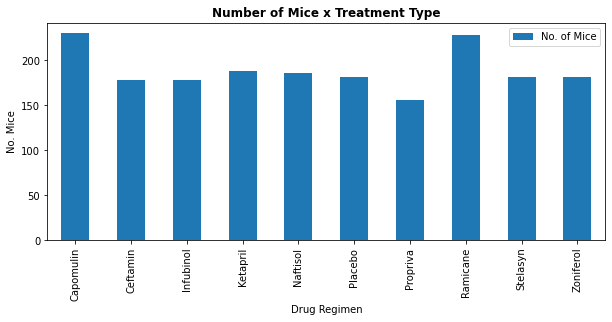

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_prep_df = clean_df.groupby("Drug Regimen")
bar_df = pd.DataFrame(bar_prep_df["Mouse ID"].count())
bar_df = bar_df.rename(columns={"Mouse ID":"No. of Mice"})
bar_df.plot(kind = "bar", figsize =(10,4))
plt.title("Number of Mice x Treatment Type", fontweight = "bold")
plt.ylabel("No. Mice")

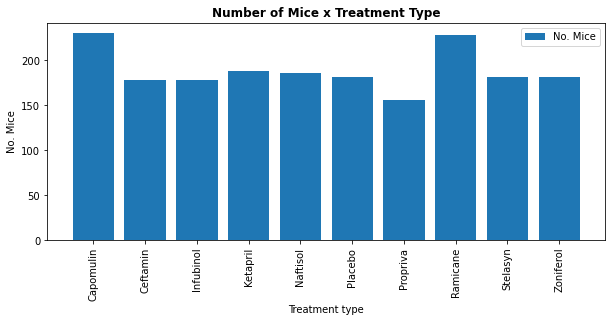

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

new_bar_df = bar_df.reset_index()
x_axis=new_bar_df["Drug Regimen"]
y_axis = new_bar_df["No. of Mice"]
plt.figure(figsize = (10,4))
plt.bar(x_axis,y_axis, label = "No. Mice")
plt.title("Number of Mice x Treatment Type", fontweight = "bold")
plt.ylabel("No. Mice")
plt.xlabel("Treatment type")
plt.xticks(rotation="vertical")
plt.legend(loc="best")
plt.show()


Text(0, 0.5, 'Mice Count')

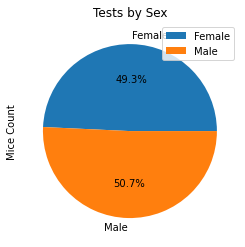

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_prep_df = clean_df.groupby("Sex")
pie_df = pd.DataFrame(pie_prep_df["Mouse ID"].count())
pie_df = pie_df.rename(columns={"Mouse ID":"No. of Mice"})
sex_pie= pie_df.plot(kind ="pie",y="No. of Mice", title="Tests by Sex",autopct="%1.1f%%")
sex_pie.set_ylabel("Mice Count")

Text(0.5, 1.0, 'Treatments by Sex')

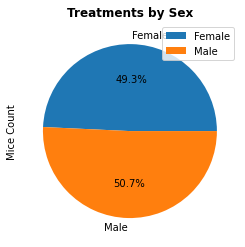

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
reset_pie_df=pie_df.reset_index()
sex = reset_pie_df["Sex"]
count = reset_pie_df["No. of Mice"]
plt.pie(count,labels=sex,autopct="%1.1f%%")
plt.legend()
plt.ylabel("Mice Count")
plt.title("Treatments by Sex", fontweight = "bold")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_df = combined_df[combined_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])][["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
f = {"Timepoint":"max", "Tumor Volume (mm3)":"last"}

# Start by getting the last (greatest) timepoint for each mouse
filtered_reduced = reduced_df.groupby(["Drug Regimen", "Mouse ID" ]).agg(f)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
filtered_reseted = filtered_reduced.reset_index()
filtered_reseted

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [13]:
# Setting up the series for each drug regimen
capomulin_series = filtered_reseted[filtered_reseted["Drug Regimen"].isin(["Capomulin"])]["Tumor Volume (mm3)"]
ramicane_series =  filtered_reseted[filtered_reseted["Drug Regimen"].isin(["Ramicane"])]["Tumor Volume (mm3)"]
infubinol_series =  filtered_reseted[filtered_reseted["Drug Regimen"].isin(["Infubinol"])]["Tumor Volume (mm3)"]
ceftamin_series=  filtered_reseted[filtered_reseted["Drug Regimen"].isin(["Ceftamin"])]["Tumor Volume (mm3)"]

In [14]:
#IQR & Outliers for Capomulin
quartiles = capomulin_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("The Results for Capomulin")
print("============================")
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The Results for Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
#IQR & Outliers for Ramicane
quartiles = ramicane_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("The Results for Ramicane")
print("============================")
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The Results for Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#IQR & Outliers for Infubinol
quartiles = infubinol_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("The Results for Infubinol")
print("============================")
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The Results for Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#IQR & Outliers for Ceftamin
quartiles = ceftamin_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("The Results for Ceftamin")
print("============================")
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The Results for Ceftamin
The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0.5, 1.0, 'Final Tumor Volume Distribution')

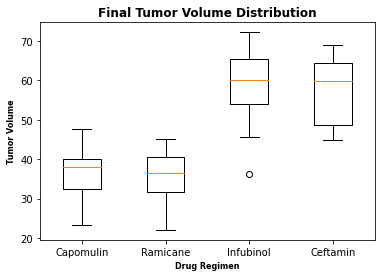

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data =[capomulin_series, ramicane_series, infubinol_series, ceftamin_series]
x_labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Drug Regimen', fontsize=8, fontweight = "bold")
ax.set_ylabel('Tumor Volume', fontsize=8, fontweight = "bold")
ax.set_title('Final Tumor Volume Distribution', fontsize=12, fontweight = "bold")

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor volume by Timepoint for s185')

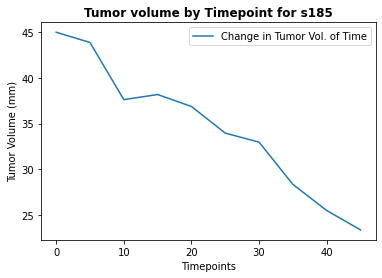

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
cap_mouse_id = "s185"
cap_mouse_df = combined_df.loc[combined_df["Mouse ID"]==cap_mouse_id]
cap_mouse_df = cap_mouse_df[["Timepoint","Tumor Volume (mm3)"]]
timepoint = cap_mouse_df["Timepoint"]
tumor_vol = cap_mouse_df["Tumor Volume (mm3)"]
plt.plot(timepoint, tumor_vol, label = "Change in Tumor Vol. of Time")
plt.legend()
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm)")
plt.title(f"Tumor volume by Timepoint for {cap_mouse_id}", fontweight = "bold")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.89x + 22.76


The r-squared is: 0.9034966277438606


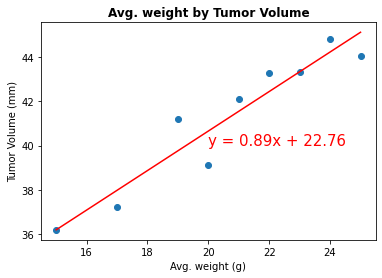

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = capomulin_df.groupby("Weight (g)")
weight_df = weight_df["Tumor Volume (mm3)"].mean().reset_index()
weight = weight_df["Weight (g)"]
avg_tumor_vol = weight_df["Tumor Volume (mm3)"]
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Avg. weight (g)")
plt.ylabel("Tumor Volume (mm)")
plt.title("Avg. weight by Tumor Volume", fontweight = "bold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")